In [461]:
#import all the essential libraries and packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy import stats
from scipy.stats import t, ttest_ind_from_stats
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [462]:
# Read the file into a Data Frame
df = pd.read_csv('openfoodfactsketoproducts.tsv', delimiter='\t', low_memory=False, encoding="utf8")

In [463]:
# This shows that it has 356027 rows and 163 columns
df.shape
print("This Data Frame has", df.shape[0], "rows and", df.shape[1], "columns")

This Data Frame has 356027 rows and 163 columns


In [464]:
# Explore the Data using the head method; shows there are lot of Nan entries
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
#Explore the Data using the tail method; shows there are lot of Nan entries
df.tail(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
356017,99111250,http://world-en.openfoodfacts.org/product/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356018,9918,http://world-en.openfoodfacts.org/product/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356019,9935010000003,http://world-en.openfoodfacts.org/product/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356020,99410148,http://world-en.openfoodfacts.org/product/9941...,date-limite-app,1463936572,2016-05-22T17:02:52Z,1491244498,2017-04-03T18:34:58Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356021,9948282780603,http://world-en.openfoodfacts.org/product/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
356023,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,http://world-en.openfoodfacts.org/product/9977...,openfoodfacts-contributors,1497018549,2017-06-09T14:29:09Z,1500730305,2017-07-22T13:31:45Z,Biscottes bio,NaN,300g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,http://world-en.openfoodfacts.org/product/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356026,999990026839,http://world-en.openfoodfacts.org/product/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:
# Exploring the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [467]:
# Further exploring the Data Frame 
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [468]:
# Listing all columns to explore and understand the Data Frame more
col_list = []
for col in df.columns:
    col_list.append(col)
print(col_list)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [469]:
# This shows that almost all columns i.e; 161 out of 163 in the data frame has null values
df.loc[:, df.isnull().any()]

,code,url,creator,created_t,created_datetime,product_name,generic_name,quantity,packaging,packaging_tags,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,Farine de blé noir,NaN,1kg,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,Plastique,plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
356023,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,Plastique,plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,http://world-en.openfoodfacts.org/product/9977...,openfoodfacts-contributors,1497018549,2017-06-09T14:29:09Z,Biscottes bio,NaN,300g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,http://world-en.openfoodfacts.org/product/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [470]:
# Can verify the above with notnull method which has only two columns without any null values
df.loc[:, df.notnull().all()]

,last_modified_t,last_modified_datetime
0,1474103893,2016-09-17T09:18:13Z
1,1489069957,2017-03-09T14:32:37Z
2,1489069957,2017-03-09T14:32:37Z
3,1489055731,2017-03-09T10:35:31Z
4,1489055653,2017-03-09T10:34:13Z
...,...,...
356022,1491244499,2017-04-03T18:34:59Z
356023,1491244499,2017-04-03T18:34:59Z
356024,1500730305,2017-07-22T13:31:45Z
356025,1492340089,2017-04-16T10:54:49Z


In [471]:
# cannot use the basic dropna method as most of the columns has Nan entries
df.dropna(how='any')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


#### Another way to clean the data would be to remove columns which has more than 70 percent of Nan entries to avoid misleading results
#### Data visualization of the missing values in our dataset

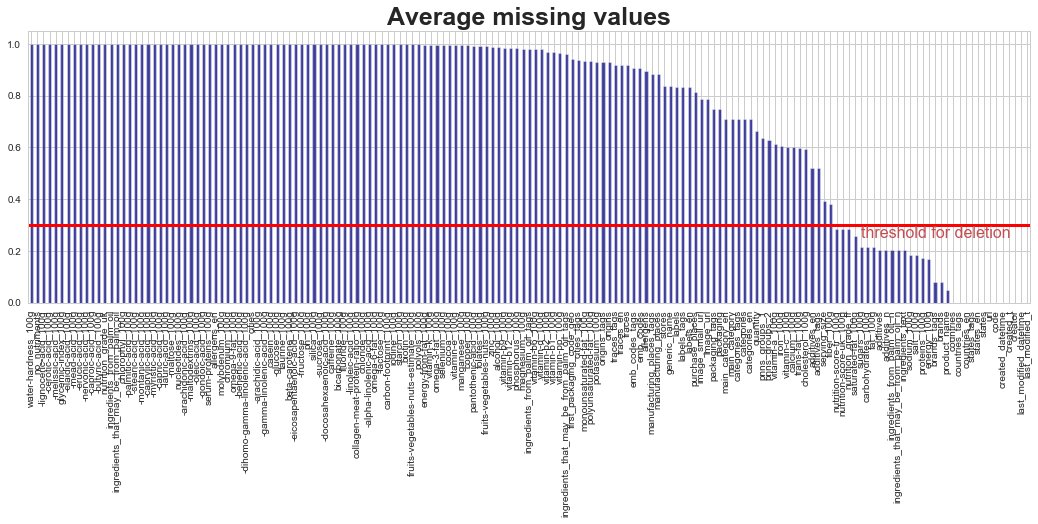

In [472]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', color='navy', alpha=0.7)
plt.axhline(y=0.3, color='red', linewidth=3, linestyle='-')
plt.title('Average missing values', fontsize=25, weight='bold')
plt.text(135, 0.25, 'threshold for deletion', fontsize = 16, color = 'r')
plt.show()

In [473]:
#Can drop the columns using the thresh parameter
df.dropna(thresh=105620, axis='columns')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,Trader Joe's,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
356023,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,50 g,乐吧,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,http://world-en.openfoodfacts.org/product/9977...,openfoodfacts-contributors,1497018549,2017-06-09T14:29:09Z,1500730305,2017-07-22T13:31:45Z,Biscottes bio,300g,Leader Price,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,http://world-en.openfoodfacts.org/product/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,67g,Knorr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
# Another way to remove the columns greater than 70 percent null values
df_new = df.loc[:, df.isnull().mean() < 0.7]

In [475]:
# Info of the new dataset shows we dropped 118 columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 45 columns):
code                                       356001 non-null object
url                                        356001 non-null object
creator                                    356024 non-null object
created_t                                  356024 non-null object
created_datetime                           356017 non-null object
last_modified_t                            356027 non-null object
last_modified_datetime                     356027 non-null object
product_name                               338515 non-null object
quantity                                   119285 non-null object
brands                                     326977 non-null object
brands_tags                                326957 non-null object
countries                                  355752 non-null object
countries_tags                             355752 non-null object
countries_en                   

In [476]:
# Exploring the new dataset
df_new.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [477]:
# Exploring the new dataset
df_new.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,...,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN
6,0000000016117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,Lundberg,...,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN,NaN,NaN
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,Daddy's Muesli,...,9.4,14.06,0.13970,0.055,NaN,NaN,0.062,0.00422,7.0,7.0
8,0000000016193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,Equal Exchange,...,7.5,5.00,NaN,NaN,NaN,NaN,0.050,0.01125,NaN,NaN
9,0000000016513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,Napa Valley Naturals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
# Exploring the new dataset
df_new.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283867.000000,283867.000000,283867.000000,295367.000000,2.794970e+05,263823.000000,143443.000000,144170.000000,2.792200e+05,279186.000000,2.206830e+05,2.941610e+05,289739.000000,289694.000000,137706.000000,141060.000000,141517.000000,140660.000000,254856.000000,254856.000000
mean,1.876851,0.023430,0.059736,1125.453320,5.606587e+04,5.092460,0.073487,0.020065,5.614020e+04,15.673428,3.843467e+05,5.326598e+04,1.941281,0.764401,0.000398,0.023394,0.127284,0.003791,9.166137,8.980656
std,2.501022,0.153094,0.280660,936.825952,2.963385e+07,7.965148,1.539417,0.357963,2.964854e+07,21.983635,1.805529e+08,2.888578e+07,120.545973,47.462729,0.073239,2.234928,3.349236,0.216565,8.999870,9.151757
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000e+00,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,382.000000,1.000000e-01,0.000000,0.000000,0.000000,5.600000e+00,1.200000,0.000000e+00,7.200000e-01,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1092.000000,5.290000e+00,1.790000,0.000000,0.000000,2.000000e+01,5.400000,1.500000e+00,4.880000e+00,0.558800,0.220000,0.000000,0.000000,0.036000,0.001010,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,2.000000e+01,7.140000,0.000000,0.020000,5.758000e+01,23.330000,3.600000e+00,1.000000e+01,1.356360,0.534000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,2.000000,6.000000,231199.000000,1.566667e+10,550.000000,369.000000,95.238000,1.566667e+10,3520.000000,8.481815e+10,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


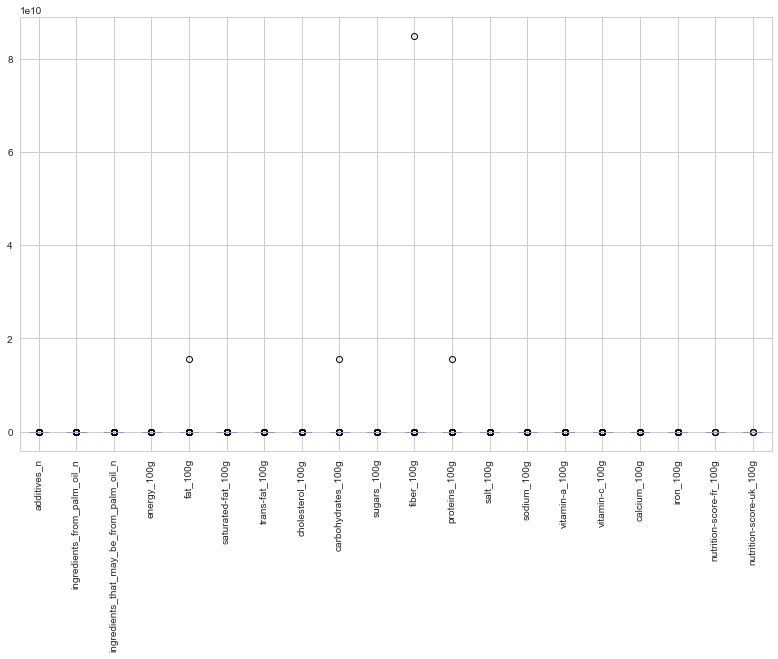

In [479]:
# Plotting the dataset into boxplot shows four extreme outliers, dont want to remove other outliers except for the extreme
# ones which we know for sure are wrong values
df_new.plot(kind='box', figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

Plotting the dataset into boxplot shows four extreme outliers. Ideally if we do not know the dataset very well, it is not recommended to remove any values as outliers. However, in this dataset there are some very obvious outliers which correspond to bad entries. Using boxplot visualization, we see there are four bad entries with really high values. These four entries along with one more entry from energy (87000 kcal still very high for 100g of product) were removed as bad entries.

In [480]:
# Selecting and removing the outlier from fat_100g will remove the row of other outliers as well
a = df_new['fat_100g'].quantile(0.9999999999999999)
df_new = df_new[df_new['fat_100g'] < a]

In [481]:
# Selecting and removing the fiber_100g outlier
b = df_new['fiber_100g'].quantile(0.999999999999999)
df_new = df_new[df_new['fiber_100g'] < b]

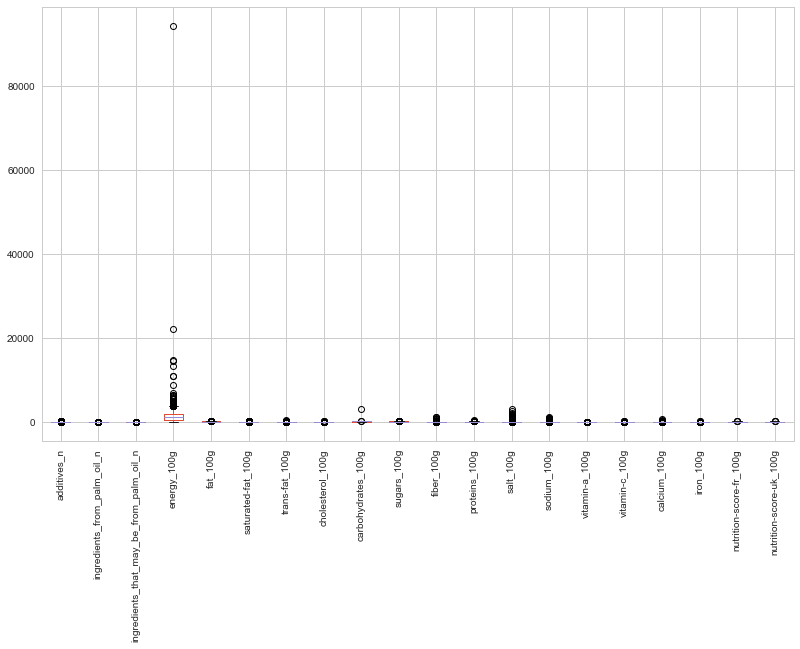

In [482]:
# Plotting the new data set again shows there is an outlier in energy_100g column
df_new.plot(kind='box', figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

In [483]:
# Selecting and removing the outlier from energy_100g
c = df_new['energy_100g'].quantile(0.999999999999999)
df_new = df_new[df_new['energy_100g'] < c]

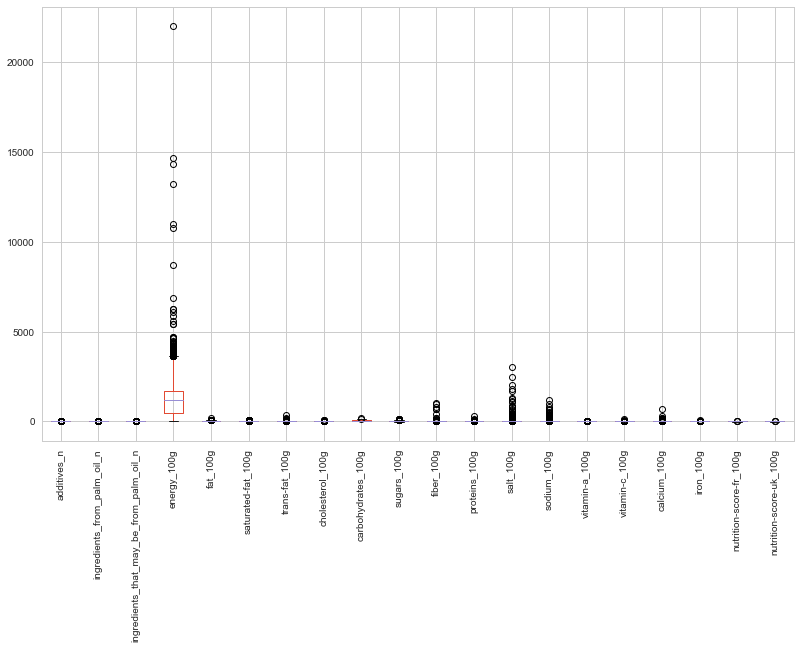

In [484]:
# Plotting the new dataset without outliers
df_new.plot(kind='box', figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

In [485]:
# Data exploration by checking the countries present in this dataset; 
# USA and France are the countries with most products in the dataset
df_new['countries_en'].value_counts().head(10)

United States            139361
France                    45829
Switzerland                8169
Spain                      1854
Germany                    1715
United Kingdom             1284
France,Switzerland          904
Belgium                     477
Belgium,France              436
France,United Kingdom       297
Name: countries_en, dtype: int64

In [486]:
# Data exploration by checking the brands present in this dataset; 
# Most frequent brands are french and american
df_new['brands'].value_counts().head(10)

Carrefour      2043
U              1872
Meijer         1631
Kroger         1383
Auchan         1217
Great Value    1130
Spartan        1091
Ahold          1090
Cora           1042
Roundy's       1019
Name: brands, dtype: int64

In [487]:
# Data exploration by checking which brands are in the US
# Looks like the brand Meijer are the most available in the US
# 'Meijer' will be used for further analysis in this project
print("What brands are in the US? \n")
us = df_new[df_new['countries_en'] == "United States"]
print(us['brands'].value_counts().head(10))

What brands are in the US? 

Meijer           1631
Kroger           1383
Great Value      1126
Spartan          1091
Ahold            1090
Roundy's         1019
Weis              938
Target Stores     827
Shoprite          805
Food Club         676
Name: brands, dtype: int64


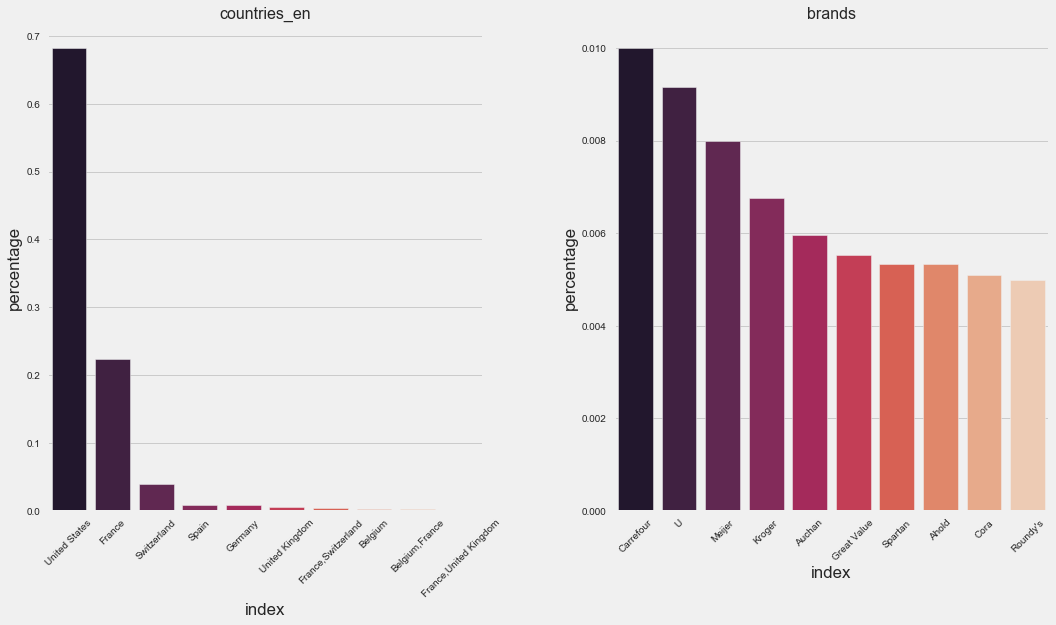

In [488]:
# Visual representation of Top countries and brands from the dataset
simple_checks = ['countries_en', 'brands']
style.use('fivethirtyeight')
rows = df_new.shape
rows = rows[0] # first entry from shape
fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax_list = [ax1,ax2]
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axes_count = 0
for c in simple_checks:
    counts = df_new[c].value_counts()
    counts = counts.to_frame(name='counts').reset_index()
    counts['percentage'] = counts['counts']/rows
    counts.drop(['counts'], axis = 1, inplace = True)
    counts_ten = counts[0:10]    
    g = sns.barplot(x='index', y='percentage', data=counts_ten, ax=ax_list[axes_count], palette="rocket")
    g.set_xticklabels(rotation = 45, labels=counts['index']) 
    ax_list[axes_count].set_title(c, fontsize=16)
    axes_count += 1
plt.show()

In [489]:
# Filtering the data and just keepting the data for Meijer brand
df_meijer = us[us['brands'] == 'Meijer']
df_meijer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 31844 to 352000
Data columns (total 45 columns):
code                                       1631 non-null object
url                                        1631 non-null object
creator                                    1631 non-null object
created_t                                  1631 non-null object
created_datetime                           1631 non-null object
last_modified_t                            1631 non-null object
last_modified_datetime                     1631 non-null object
product_name                               1631 non-null object
quantity                                   2 non-null object
brands                                     1631 non-null object
brands_tags                                1631 non-null object
countries                                  1631 non-null object
countries_tags                             1631 non-null object
countries_en                               1631 non-null o

In [490]:
# Looks like there are some null values in the above dataset; let's fill them with 0
df_meijer = df_meijer.fillna(0, axis=1)
df_meijer.info() # No more null entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 31844 to 352000
Data columns (total 45 columns):
code                                       1631 non-null object
url                                        1631 non-null object
creator                                    1631 non-null object
created_t                                  1631 non-null object
created_datetime                           1631 non-null object
last_modified_t                            1631 non-null object
last_modified_datetime                     1631 non-null object
product_name                               1631 non-null object
quantity                                   1631 non-null object
brands                                     1631 non-null object
brands_tags                                1631 non-null object
countries                                  1631 non-null object
countries_tags                             1631 non-null object
countries_en                               1631 non-nul

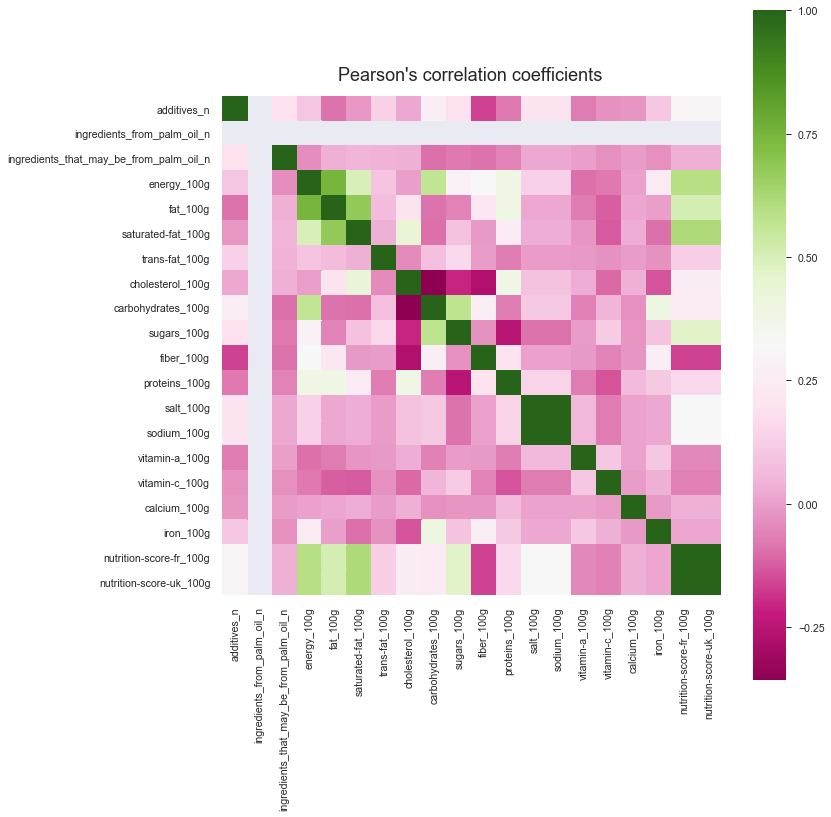

In [491]:
sns.set(context="paper", font_scale = 1.2)
corrmat = df_meijer.corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.55, 0.90, "Pearson's correlation coefficients", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, cmap="PiYG")
plt.tight_layout()

Text(0, 0.5, 'nutrition-score-fr_100g')

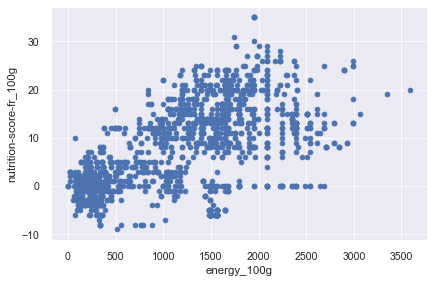

In [492]:
# Using scatterplot to view the data points with hight correlation coefficients
plt.scatter(df_meijer['energy_100g'], df_meijer['nutrition-score-fr_100g'])
plt.xlabel('energy_100g')
plt.ylabel('nutrition-score-fr_100g')

Text(0, 0.5, 'fat_100g')

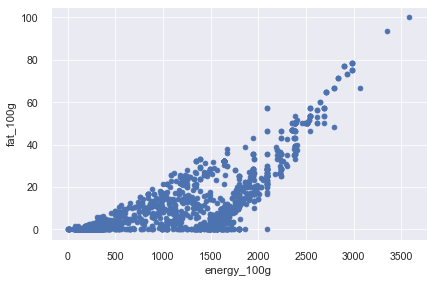

In [493]:
plt.scatter(df_meijer['energy_100g'], df_meijer['fat_100g'])
plt.xlabel('energy_100g')
plt.ylabel('fat_100g')

Text(0, 0.5, 'fat_100g')

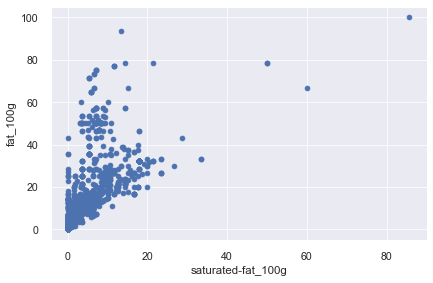

In [494]:
plt.scatter(df_meijer['saturated-fat_100g'], df_meijer['fat_100g'])
plt.xlabel('saturated-fat_100g')
plt.ylabel('fat_100g')

Text(0, 0.5, 'carbohydrates_100g')

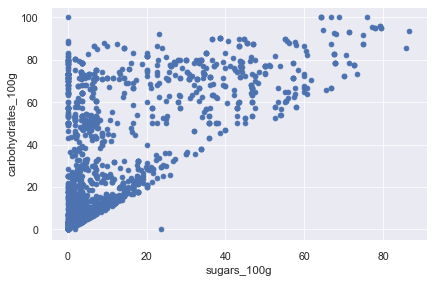

In [495]:
plt.scatter(df_meijer['sugars_100g'], df_meijer['carbohydrates_100g'])
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')

#### Let's see if there is any difference between the nutritional values for different brand products within USA
##### Let us compare the top two brands in the USA: Meijer and Kroger
We already have a seperate dataframe for the Meijer brand products since we are focusing on that in this project. Let's create a seperate dataframe for the Kroger products

In [496]:
# Let us compare the top two brands in the USA: Meijer and Kroger
df_kroger = us[us['brands'] == 'Kroger']
df_kroger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 1769 to 312994
Data columns (total 45 columns):
code                                       1383 non-null object
url                                        1383 non-null object
creator                                    1383 non-null object
created_t                                  1383 non-null object
created_datetime                           1383 non-null object
last_modified_t                            1383 non-null object
last_modified_datetime                     1383 non-null object
product_name                               1383 non-null object
quantity                                   13 non-null object
brands                                     1383 non-null object
brands_tags                                1383 non-null object
countries                                  1383 non-null object
countries_tags                             1383 non-null object
countries_en                               1383 non-null o

In [497]:
# Looks like there are some null values in the above dataset; let's fill them with 0
df_kroger = df_kroger.fillna(0, axis=1)
df_kroger.info() # No more null entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 1769 to 312994
Data columns (total 45 columns):
code                                       1383 non-null object
url                                        1383 non-null object
creator                                    1383 non-null object
created_t                                  1383 non-null object
created_datetime                           1383 non-null object
last_modified_t                            1383 non-null object
last_modified_datetime                     1383 non-null object
product_name                               1383 non-null object
quantity                                   1383 non-null object
brands                                     1383 non-null object
brands_tags                                1383 non-null object
countries                                  1383 non-null object
countries_tags                             1383 non-null object
countries_en                               1383 non-null

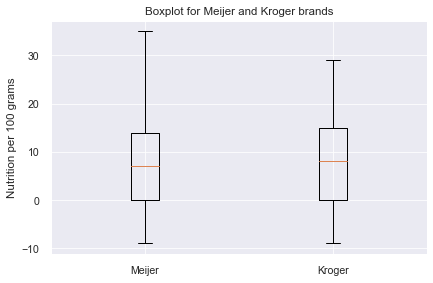

In [498]:
plt.boxplot([df_meijer['nutrition-score-fr_100g'], df_kroger['nutrition-score-fr_100g']], labels = ["Meijer", "Kroger"])
plt.ylabel("Nutrition per 100 grams")
plt.title('Boxplot for Meijer and Kroger brands')
plt.show()

It looks like the Meijer products are more symmetrically distributed than the Kroger products.Let's do the t-test and obtain the p value for hypothesis testing
#### Null hypothesis = There is NO difference in the means of nutritional values between the two brands
#### Alternative hypothesis = There is difference in the means of nutritional values between the two brands

In [499]:
# Assuming the variance is not equal
t_statistic, p_value = stats.ttest_ind(df_meijer['nutrition-score-fr_100g'], df_kroger['nutrition-score-fr_100g'], equal_var=False)
t_statistic, p_value

(-1.5223832289732016, 0.1280212875730153)

Since the p-value is greater than 0.05, we cannot reject the null hypothesis.We can conclude that the nutritional score for both brands are similar. Hence my further analysis with Meijer brands can also be easily applied to Kroger brand products. Since the sample size is not big enough, bootstrapping will be a good approach as well.

In [500]:
# Since the sample size is not big enough, let's do the same with bootstrapping and 
# see how different are the products within those two selected brands

# function for drawing bootstrap replicates 
np.random.seed(47)
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample)
        
    return bs_replicates

##### For alpha = 0.05,

#### Null Hypothesis (H_0) : there is no difference in nutrition score between Meijer and Kroger brand products

#### Alternate Hypothesis (H_a) : there is a difference in nutrition score between Meijer and Kroger brand products

The test statistic I will be using is the mean. I will be computing the differences in means of the two groups to determine if there are any differences between the groups. To do this, I must shift the means of each group so that they have equal means.

In [501]:
# We will calculate the difference between the means between the two groups of products to see if both brands
# have similar distribution of nutritional scores
meijer_nutri = df_meijer['nutrition-score-fr_100g']
kroger_nutri = df_kroger['nutrition-score-fr_100g']
obs_diff_mean = np.mean(meijer_nutri) - np.mean(kroger_nutri)
obs_diff_mean

-0.49530140228659025

In [502]:
# Shifting the dataset so that they have the same mean
# Calculate the combined mean
concat = np.concatenate([meijer_nutri, kroger_nutri])
combined_mean = np.mean(concat)
# Calculate the shifted data
meijer_shifted = meijer_nutri - np.mean(meijer_nutri) + combined_mean
kroger_shifted = kroger_nutri - np.mean(kroger_nutri) + combined_mean

In [503]:
# Perform bootstrapping on the shifted dataset
bs_reps_shifted_meijer = draw_bs_reps(meijer_shifted, np.mean, size=10000)
bs_reps_shifted_kroger = draw_bs_reps(kroger_shifted, np.mean, size=10000)
# Calculate the difference in means of the bootstrapped data
bs_diff_mean = bs_reps_shifted_meijer - bs_reps_shifted_kroger

In [504]:
# compute the p-value
p_value = np.sum(bs_diff_mean >= obs_diff_mean)/len(bs_diff_mean)
print("The p-value for the bootstrapped dataset is: " + format(p_value))

The p-value for the bootstrapped dataset is: 0.9376


This confirms the previous hypothesis as well, since the p value is greater than 0.05 (alpha), we cannot reject the null hypothesis and hence proves there is no difference in terms of nutritional score in the two brands we are comparing.

In [505]:
con_int_95_mean = np.percentile(bs_diff_mean, [2.5,97.5])
con_int_95_mean

array([-0.63002358,  0.64718782])

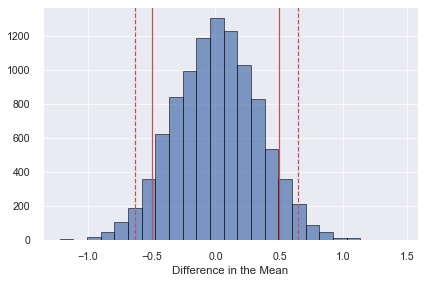

In [506]:
plt.hist(bs_diff_mean, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Difference in the Mean')
plt.axvline(con_int_95_mean[0], color='r', linestyle='--')
plt.axvline(con_int_95_mean[1], color='r', linestyle='--')
plt.axvline(obs_diff_mean, color='r')
plt.axvline(-obs_diff_mean, color='r') # plotting both negative and positive values of the observed data
plt.show()

In [507]:
# let's test the same hypothesis between Meijer and Great value products, so that we have covered the top three brands
# in the USA
df_greatvalue = us[us['brands'] == 'Great Value']
df_greatvalue = df_greatvalue.fillna(0, axis=1)
df_greatvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 10453 to 177203
Data columns (total 45 columns):
code                                       1126 non-null object
url                                        1126 non-null object
creator                                    1126 non-null object
created_t                                  1126 non-null object
created_datetime                           1126 non-null object
last_modified_t                            1126 non-null object
last_modified_datetime                     1126 non-null object
product_name                               1126 non-null object
quantity                                   1126 non-null object
brands                                     1126 non-null object
brands_tags                                1126 non-null object
countries                                  1126 non-null object
countries_tags                             1126 non-null object
countries_en                               1126 non-nul

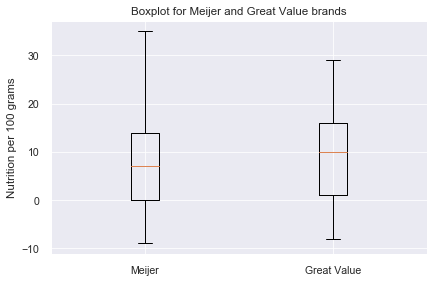

In [508]:
plt.boxplot([df_meijer['nutrition-score-fr_100g'], df_greatvalue['nutrition-score-fr_100g']], labels = ["Meijer", "Great Value"])
plt.ylabel("Nutrition per 100 grams")
plt.title('Boxplot for Meijer and Great Value brands')
plt.show()

It looks like the Meijer products are more symmetrically distributed than the Great Value products.
Let's do the t-test and obtain the p value for hypothesis testing
##### Null hypothesis = There is NO difference in the means of nutritional values between the two brands
##### Alternative hypothesis = There is difference in the means of nutritional values between the two brands

In [509]:
# Assuming the variance is not equal
t_statistic_2, p_value_2 = stats.ttest_ind(df_meijer['nutrition-score-fr_100g'], df_greatvalue['nutrition-score-fr_100g'], equal_var=False)
t_statistic_2, p_value_2

(-2.900999593360506, 0.003753784672904293)

Here the p-value is statistically significant, and hence we can reject the null hypothesis which proves that the brands we are comparing are different in their nutritional scores. Let's do the same using bootstrapping.

In [510]:
greatvalue_nutri = df_greatvalue['nutrition-score-fr_100g']
obs_diff_mean_2 = np.mean(meijer_nutri) - np.mean(greatvalue_nutri)
obs_diff_mean_2

-1.0070329201211434

In [511]:
# Shifting the dataset so that they have the same mean
# Calculate the combined mean
concat_2 = np.concatenate([meijer_nutri, greatvalue_nutri])
combined_mean_2 = np.mean(concat_2)
# Calculate the shifted data
meijer_shifted_2 = meijer_nutri - np.mean(meijer_nutri) + combined_mean_2
greatvalue_shifted = greatvalue_nutri - np.mean(greatvalue_nutri) + combined_mean_2
# Perform bootstrapping on the shifted dataset
bs_reps_shifted_meijer_2 = draw_bs_reps(meijer_shifted_2, np.mean, size=10000)
bs_reps_shifted_greatvalue = draw_bs_reps(greatvalue_shifted, np.mean, size=10000)
# Calculate the difference in means of the bootstrapped data
bs_diff_mean_2 = bs_reps_shifted_meijer_2 - bs_reps_shifted_greatvalue
# compute the p-value
p_value_2 = np.sum(bs_diff_mean_2 >= obs_diff_mean_2)/len(bs_diff_mean_2)
print("The p-value for the bootstrapped dataset is: " + format(p_value_2))

The p-value for the bootstrapped dataset is: 0.9989


In [512]:
con_int_95_mean_2 = np.percentile(bs_diff_mean_2, [2.5,97.5])
con_int_95_mean_2

array([-0.66907014,  0.70457533])

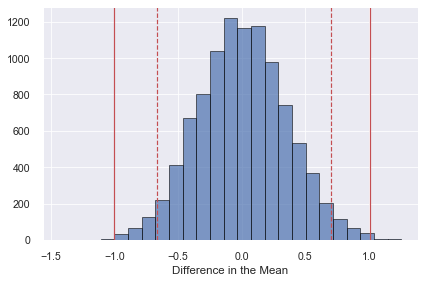

In [513]:
plt.hist(bs_diff_mean_2, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Difference in the Mean')
plt.axvline(con_int_95_mean_2[0], color='r', linestyle='--')
plt.axvline(con_int_95_mean_2[1], color='r', linestyle='--')
plt.axvline(obs_diff_mean_2, color='r')
plt.axvline(-obs_diff_mean_2, color='r') # plotting both negative and positive values of the observed data
plt.show()

The bootstrapping method shows p-value greater than 0.05, so we cannot reject null hypothesis here. So there is still a possibility that both the brands are similar in their nutritional scores. Here my assumption is that my further analysis of Meijer products can easily be applied to other popular brands.

#### Lets continue with Meijer brand products
Lets keep only the features we are interested in for Keto diet which are protein, carbs, sugar, fat, etc.

In [514]:
df_keto = df_meijer[['product_name', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'nutrition-score-fr_100g']]

In [515]:
# Let's make a new column adding both the fat and saturated-fat columns which will be our total fat; this way it will be
# easy to filter the products for further keto analysis
total_fat = df_meijer['fat_100g'] + df_meijer['saturated-fat_100g']
df_keto['total_fat'] = total_fat

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [516]:
# We have 1631 products and 7 columns
df_keto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 31844 to 352000
Data columns (total 9 columns):
product_name               1631 non-null object
energy_100g                1631 non-null float64
fat_100g                   1631 non-null float64
saturated-fat_100g         1631 non-null float64
carbohydrates_100g         1631 non-null float64
sugars_100g                1631 non-null float64
proteins_100g              1631 non-null float64
nutrition-score-fr_100g    1631 non-null float64
total_fat                  1631 non-null float64
dtypes: float64(8), object(1)
memory usage: 127.4+ KB


Let's start building a shopping guide for people starting the Keto diet by filtering the grosseries:
Generally, popular ketogenic resources suggest an average of 70-80% fat from total daily calories, 5-10% carbohydrate, and 10-20% protein. 

For a 2000-calorie diet, this translates to about 165 grams fat, 40 grams carbohydrate, and 75 grams protein. It's just an overview of the products that might be suitable for a keto diet meal plan (since the nutrient values we are dealing with are in the 100g portion). 

We will start our analysis by filtering the rows and columns, discarding the elements that have higher energetic or nutritive values:

In [517]:
df_keto_filtered = df_keto[(df_keto['energy_100g']<2000)&(df_keto['carbohydrates_100g']<40)&(df_keto['total_fat']<165)&(df_keto['proteins_100g']<75)]
print('We have ',df_keto_filtered.shape[0],' keto products in Meijer supermarkets in the United States')

We have  832  keto products in Meijer supermarkets in the United States


In [518]:
df_keto_filtered.sort_values(by=['total_fat'], ascending=False)

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,total_fat
130967,Soft Ripened Brie Cheese,1941.0,42.86,28.57,3.57,0.00,17.86,21.0,71.43
134774,Heavy Whipping Cream,1393.0,33.33,23.33,6.67,0.00,0.00,14.0,56.66
41109,Heavy Whipping Cream,1393.0,33.33,23.33,6.67,0.00,0.00,14.0,56.66
130666,Cream Cheese,1343.0,32.14,21.43,7.14,7.14,7.14,18.0,53.57
41550,Cream Cheese,1343.0,32.14,21.43,7.14,7.14,7.14,18.0,53.57
...,...,...,...,...,...,...,...,...,...
130580,Organic Mango Chunk,268.0,0.00,0.00,15.00,9.29,0.71,1.0,0.00
130581,"True Goodness, Organic Pineapple Chunks",238.0,0.00,0.00,15.71,11.43,0.71,1.0,0.00
130582,Organic Triple Berry Blend,238.0,0.00,0.00,12.14,7.86,0.71,-1.0,0.00
130595,"Baby, Apple Purne Baby Food",297.0,0.00,0.00,19.47,13.27,0.88,0.0,0.00


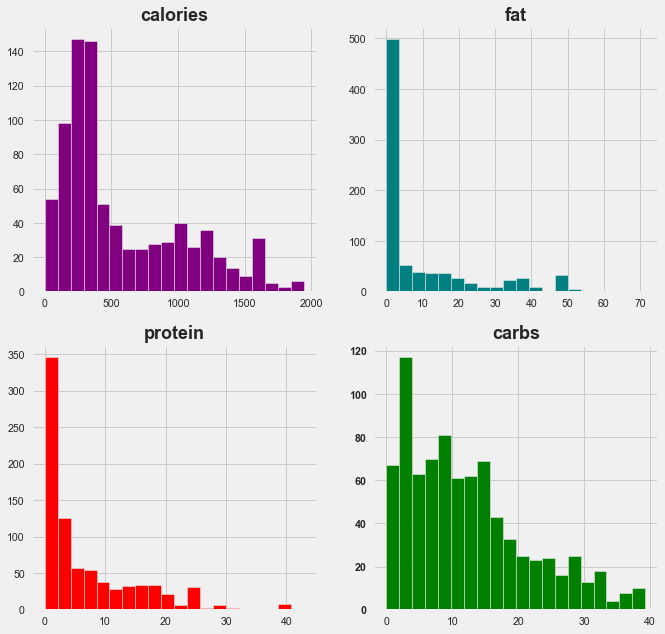

In [519]:
# Let's look at the distribution of the nutritive values in the filtered keto products
plt.style.use('fivethirtyeight')
fig= plt.figure(figsize=(10,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot(221)
plt.hist(df_keto_filtered.energy_100g, bins=20, color='purple')
plt.title('calories',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot(222)
plt.hist(df_keto_filtered.total_fat, bins=20, color='teal')
plt.title('fat',weight='bold', fontsize=18)
#Second row first column
ax1 = plt.subplot(223)
plt.hist(df_keto_filtered.proteins_100g, bins=20, color='red')
plt.title('protein',weight='bold', fontsize=18)
#second row second column
ax1 = plt.subplot(224)
plt.hist(df_keto_filtered.carbohydrates_100g, bins=20, color='green')
plt.title('carbs',weight='bold', fontsize=18)
plt.yticks(weight='bold')

plt.show()

The distribution of the above components looks good, in accordance to our keto diet with calories in between 0-500, carbs around 0-15g, protein around 0-20 which is recommended for each meal, and fat around 0-20g and around 40g & 50g.

In [520]:
def label_cal(row):
   if row['energy_100g']<250:
      return 'low'
   if row['energy_100g']>=250 and row['energy_100g']<500:
      return 'medium'
   if row['energy_100g']>=500:
      return 'high'
   
   return 'Other'

def label_fat(row):
   if row['total_fat']<10:
      return 'low'
   if row['total_fat']>=10 and row['total_fat']<20:
      return 'medium'
   if row['total_fat']>=20 :
      return 'high'
   
   return 'Other'

def label_pro(row):
   if row['proteins_100g']<10:
      return 'low'
   if row['proteins_100g']>=10 and row['proteins_100g']<20:
      return 'medium'
   if row['proteins_100g']>=20:
      return 'high'
   
   return 'Other'

def label_carb(row):
   if row['carbohydrates_100g']<4:
      return 'low'
   if row['carbohydrates_100g']>=4 and row['carbohydrates_100g']<12:
      return 'medium'
   if row['carbohydrates_100g']>=12:
      return 'high'
   
   return 'Other'

# let's add those filtered new columns to the existing keto dataset:
df_keto_filtered['calories'] = df_keto_filtered.apply (lambda row: label_cal(row), axis=1)

df_keto_filtered['fat'] = df_keto_filtered.apply (lambda row: label_fat(row), axis=1)

df_keto_filtered['protein'] = df_keto_filtered.apply (lambda row: label_pro(row), axis=1)

df_keto_filtered['carbs'] = df_keto_filtered.apply (lambda row: label_carb(row), axis=1)

df_keto_filtered
#Create dataframe of value counts of each category

dcal = df_keto_filtered['calories'].value_counts().reset_index()
dfat = df_keto_filtered['fat'].value_counts().reset_index()
dpro = df_keto_filtered['protein'].value_counts().reset_index()
dcarb = df_keto_filtered['carbs'].value_counts().reset_index()

#Merge the counts on the 'index' column:
counts = dcal.merge(dfat,on='index').merge(dpro, on='index').merge(dcarb, on='index')
print(counts)

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

    index  calories  fat  protein  carbs
0    high       329  146       73    372
1  medium       254  106      157    276
2     low       249  580      602    184


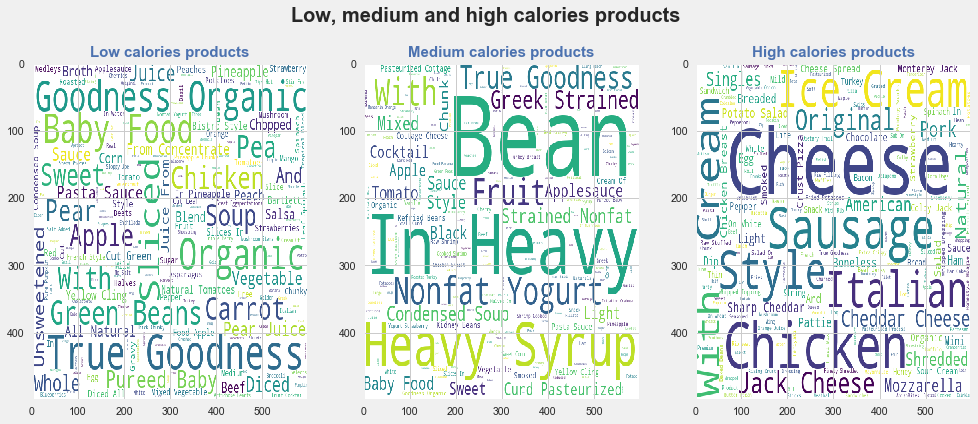

In [521]:
# Let's make a WordCloud of low, medium, and high products that we seperated
ketocloud=df_keto_filtered[['product_name', 'calories', 'protein','fat','carbs']]
keto_low=ketocloud.loc[ketocat['calories']=='low']
keto_medium=ketocloud.loc[ketocat['calories']=='medium']
keto_high=ketocloud.loc[ketocat['calories']=='high']

wordcloud1 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_low['product_name']))
WordCloud.generate_from_frequencies


wordcloud2 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_medium['product_name']))
WordCloud.generate_from_frequencies


wordcloud3 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_high['product_name']))
WordCloud.generate_from_frequencies


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
fig.suptitle('Low, medium and high calories products', weight='bold', fontsize=20)

ax1.set_title('Low calories products', weight='bold', fontsize=15, color='b')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(wordcloud1, aspect='auto')

ax2.set_title('Medium calories products', weight='bold', fontsize=15, color='b')
im2 = ax2.imshow(wordcloud2, aspect='auto')

ax3.set_title('High calories products', weight='bold', fontsize=15, color='b')
im3 = ax3.imshow(wordcloud3, aspect='auto')
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

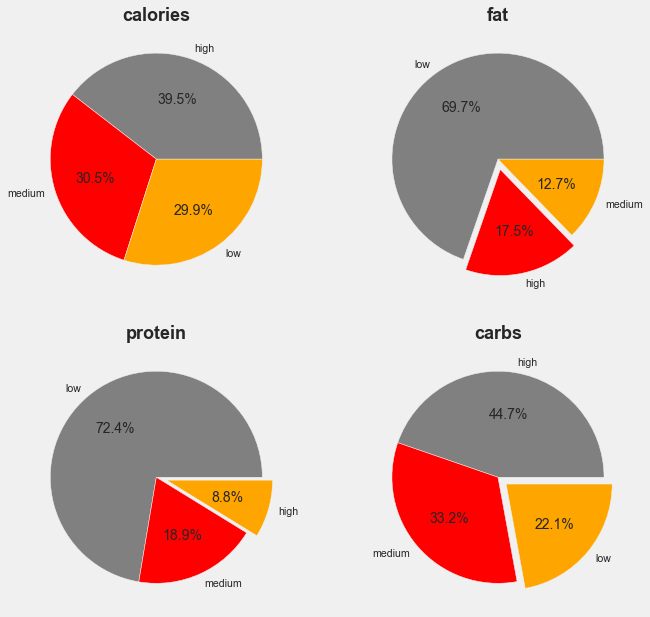

In [522]:
# Let's see this more visually to see the distribution of the products

label1 = dcal['index']
label2 = dfat['index']
label3 = dpro['index']
label4 = dcarb['index']


fig = plt.figure(figsize=(10,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(dcal['calories'],colors=("grey","red","orange"),labels=label1, autopct='%2.1f%%')
plt.title('calories',weight='bold', fontsize=18)

#first row sec col
ax1 = plt.subplot2grid((2,2), (0,1))
explode = (0, 0.1, 0) #exploding the chunk we are interested in i.e; high fat
plt.pie(dfat['fat'],colors=("grey","red","orange"),labels=label2,explode=explode, autopct='%2.1f%%')
plt.title('fat',weight='bold', fontsize=18)

#Second row first column
ax1 = plt.subplot2grid((2,2), (1,0))
explode = (0, 0, 0.1) #exploding the chunk we are interested in i.e; high protein
plt.pie(dpro['protein'],colors=("grey","red","orange"),labels=label3,explode=explode, autopct='%2.1f%%')
plt.title('protein',weight='bold', fontsize=18)

#second row second column
ax1 = plt.subplot2grid((2,2), (1,1))
explode = (0, 0, 0.1) #exploding the chunk we are interested in i.e; low carbs
plt.pie(dcarb['carbs'],colors=("grey","red","orange"),labels=label4,explode=explode, autopct='%2.1f%%')
plt.title('carbs',weight='bold', fontsize=18)
plt.show()

In [523]:
# Seperating the numeric columns from the dataframe required for the machine learning.
keto_ml = df_keto_filtered[['energy_100g', 'total_fat', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g']]

In [524]:
# import libraries required for machine learning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [525]:
# scaling the values between 0 and 1. The shape of the distribution will remain the same
scaler = StandardScaler()
scaler.fit(keto_ml)
keto_scaled = scaler.transform(keto_ml)

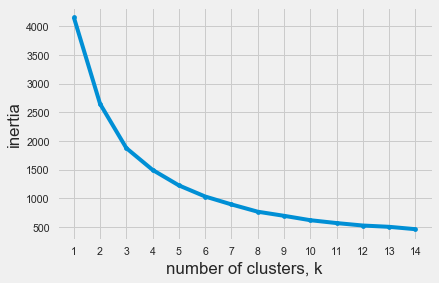

In [526]:
# calculation the inertia's of different k clusters to determine which number of cluster is the best based on elbow shape
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(keto_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The elbow shape is not that clear, its more of a curved graph. I would pick maybe 6 or 7 clusters

In [527]:
# Fitting and predicting the model using k_clusters=6
kmeans = KMeans(n_clusters = 6, random_state=10)
df_keto_filtered['k_clusters'] = kmeans.fit_predict(keto_scaled)

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


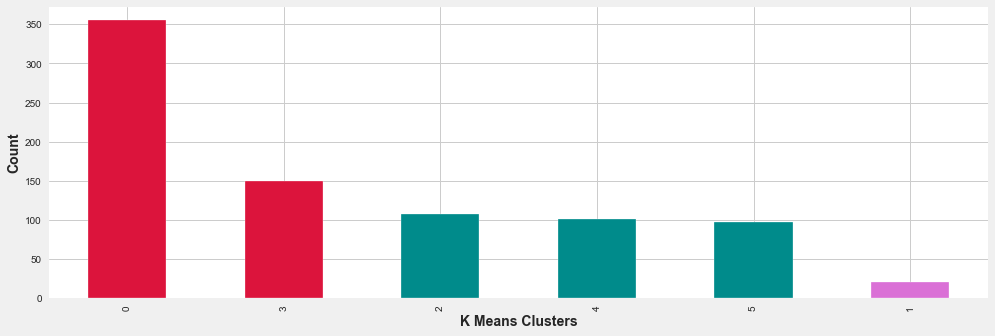

In [528]:
# Added the prediction to the original dataframe and made a bar plot to see the size of the clusters
# We have 2 large, 3 medium, and 1 small sized cluster which I colored the same
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
sns.set_style('whitegrid')
df_keto_filtered['k_clusters'].value_counts().plot(kind='bar', color=['crimson', 'crimson', 'darkcyan', 'darkcyan',
                                                                      'darkcyan', 'orchid'])
plt.ylabel("Count",fontsize=14, weight='bold')
plt.xlabel('K Means Clusters', fontsize=14, weight='bold')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43065890924068806


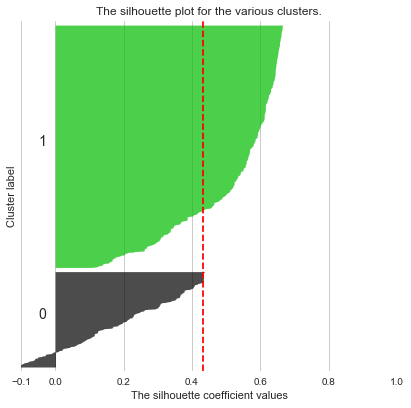

For n_clusters = 3 The average silhouette_score is : 0.41317968519677745


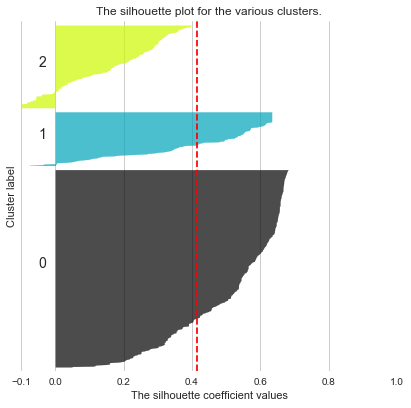

For n_clusters = 4 The average silhouette_score is : 0.40489311436945363


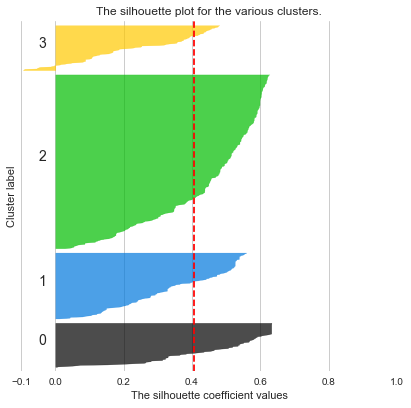

For n_clusters = 5 The average silhouette_score is : 0.4173270542055732


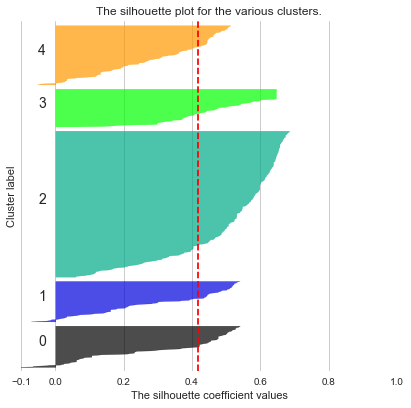

For n_clusters = 6 The average silhouette_score is : 0.42338121089829034


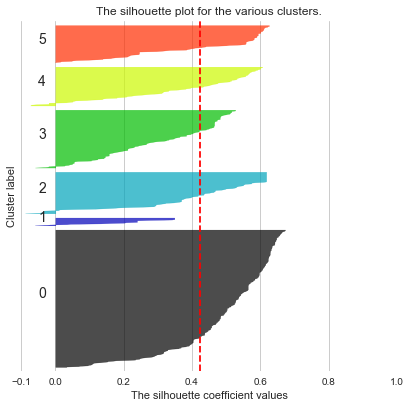

For n_clusters = 7 The average silhouette_score is : 0.4154673107189881


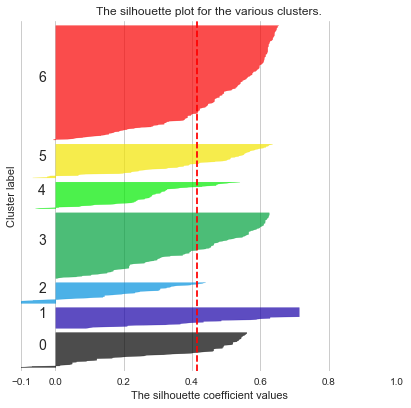

For n_clusters = 8 The average silhouette_score is : 0.4282022531167531


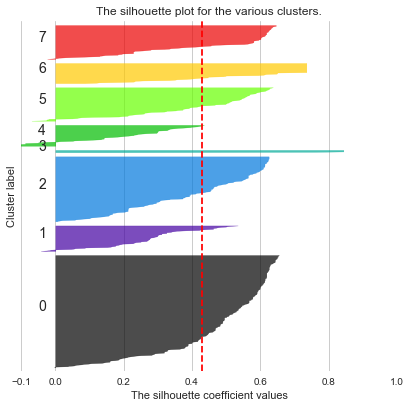

For n_clusters = 9 The average silhouette_score is : 0.43294060634462217


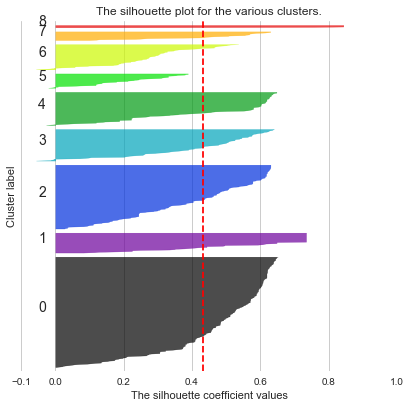

For n_clusters = 10 The average silhouette_score is : 0.4271182614736156


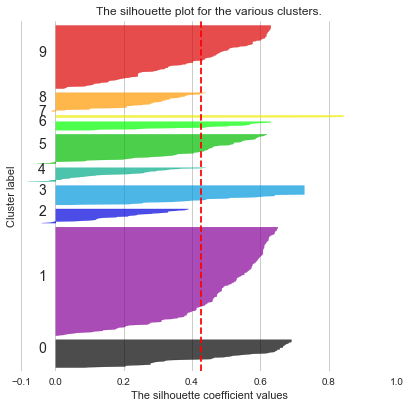

In [529]:
# Since the elbow graph from inertias did not give a clear idea of number of clusters, let's get the silhouette scores
# for different k clusters.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
silhouette_avg_scores = [] # empty array to plot silhouette scores later
X = keto_scaled
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:

    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(6, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

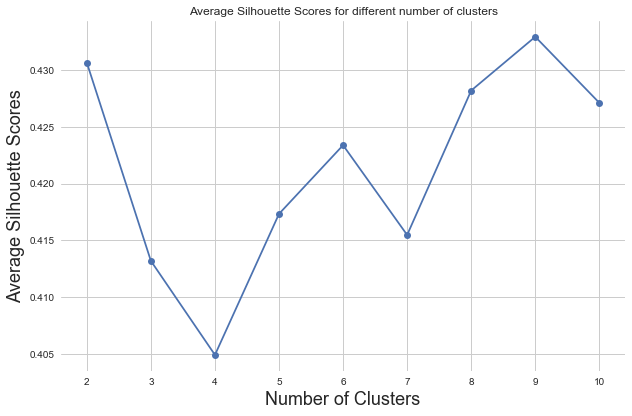

In [530]:
# Let's plot the silhouette scores for all clusters, looks like cluster 2 and 9 have the highest scores
plt.figure(figsize=(9,6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel("Number of Clusters", fontsize=18)
plt.ylabel("Average Silhouette Scores", fontsize=18)
plt.title("Average Silhouette Scores for different number of clusters")
#plt.grid(False)
plt.show()

In [531]:
from sklearn.decomposition import PCA
new_cluster = KMeans(n_clusters=9, random_state=10) # 9 clusters determined from the silhouette score
df_keto_filtered['new_cluster'] = new_cluster.fit_predict(keto_scaled)

pca = PCA(n_components=2)

# # Make two columns (x & y) for PCA axes 

df_keto_filtered['x'] = pca.fit_transform(keto_scaled)[:,0]  # 1st column --> 'x'
df_keto_filtered['y'] = pca.fit_transform(keto_scaled)[:,1]  # 2nd column --> 'y'

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

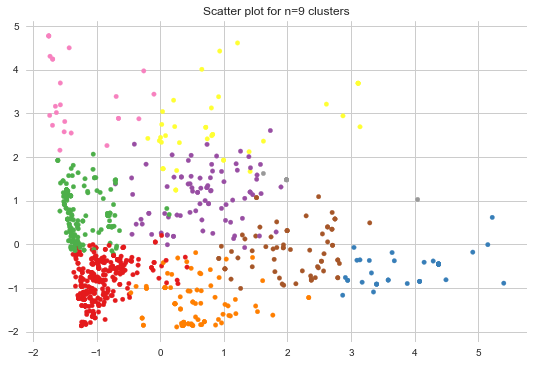

In [532]:
#scatter plot for n=9
plt.scatter(df_keto_filtered['x'], df_keto_filtered['y'], c=df_keto_filtered['new_cluster'], cmap='Set1', s=20)
plt.title("Scatter plot for n=9 clusters")
plt.show()

In [533]:
# # First make predictions with different K-values to visualize different clusters
# Adding the predictions to the original dataframe
k_values = list(range(2, 11))

for k in k_values: 
    kmeans = KMeans(n_clusters=k, random_state = 10)
    k_pred_array = kmeans.fit_predict(keto_scaled)
    df_keto_filtered['cluster_' + str(k)] = k_pred_array

df_keto_filtered.head()

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,total_fat,calories,...,y,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
31844,Organic Caesar Salad,536.0,10.33,1.63,7.61,1.09,2.72,1.0,11.96,high,...,-0.777088,1,0,2,2,0,6,0,0,1
31845,"Organic Garden Salad, Organic Ranch Dressing",452.0,7.77,0.97,7.77,2.91,1.94,1.0,8.74,medium,...,-0.653174,1,0,2,2,0,6,0,0,1
40938,Chopped Mustard Greens,67.0,0.00,0.00,3.12,0.78,1.56,-2.0,0.00,low,...,-1.527744,1,0,2,2,0,6,0,0,1
40939,Chopped Turnip Greens,50.0,0.00,0.00,3.12,0.00,0.78,-3.0,0.00,low,...,-1.606836,1,0,2,2,0,6,0,0,1
40940,Chopped Kale,84.0,0.39,0.00,3.91,0.00,1.56,-3.0,0.39,low,...,-1.531984,1,0,2,2,0,6,0,0,1


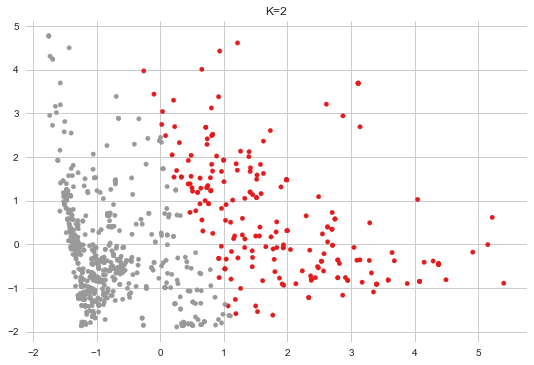

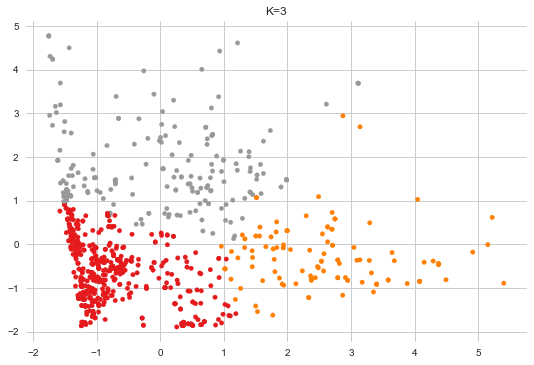

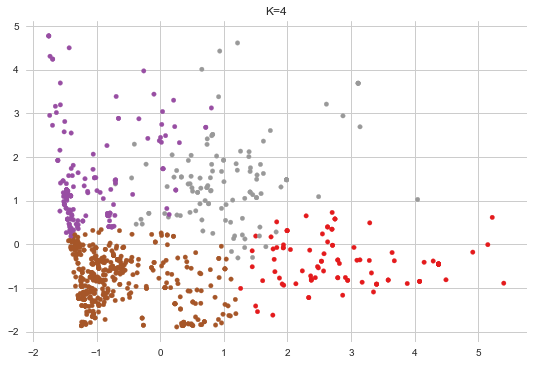

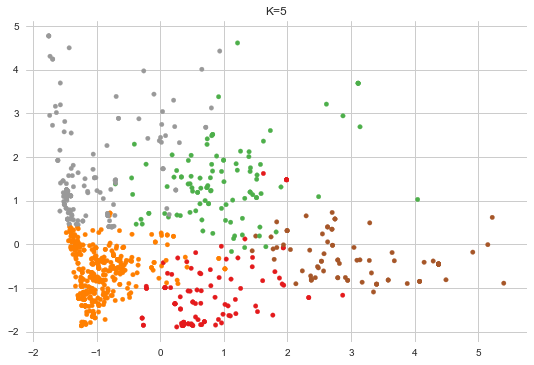

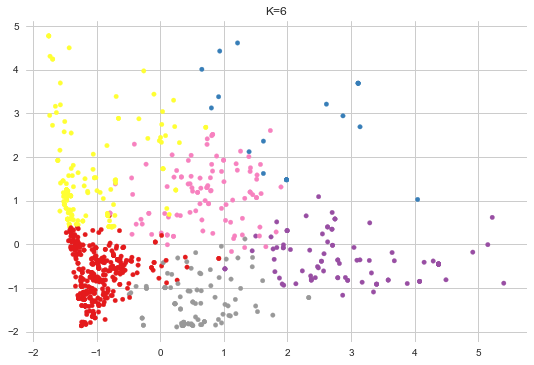

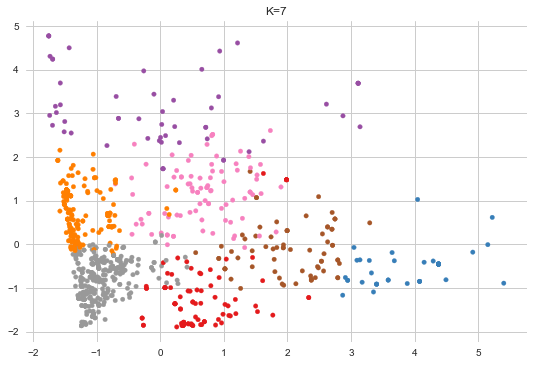

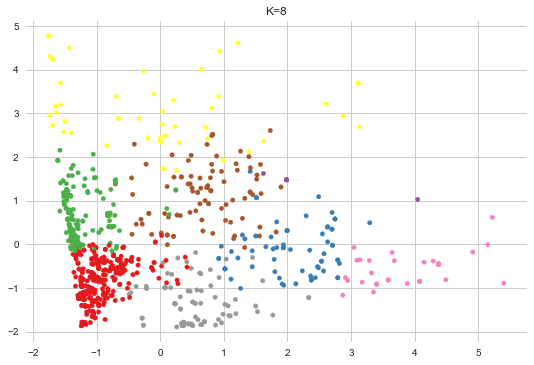

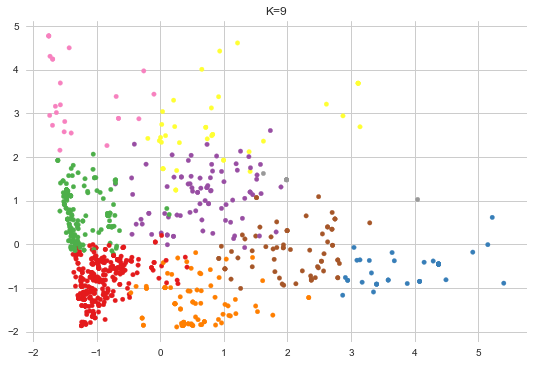

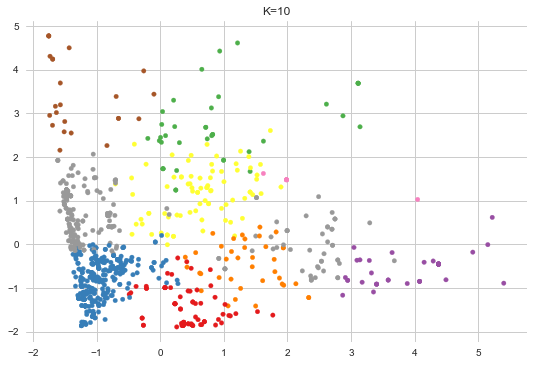

In [534]:
# Let's visualize the distribution of the points in different k_clusters in a 2D scatter plot since we already have
# PCA transformed coordinates
for k in range(2,11):
    plt.scatter(df_keto_filtered['x'], df_keto_filtered['y'], c=df_keto_filtered['cluster_'+str(k)], cmap='Set1', s=20)
    plt.title("K=" + str(k))
    plt.show()

Looking at the silhouette_score, clusters 2 and 9 show the best score. However looking at the 2-D scatter plot of the points using PCA shows that the values are too spread out, so choosing 2 clusters to analyze the data will not be a good choice and 9 clusters will be a lot to analyze and draw good conclusions out of each clusers, so I will stick with my previous choice of 6 clusters and use the predicted values of n_clusters = 6 which is stored in k_clusters.

In [535]:
# Making the final dataset taking only the required columns
final_df = df_keto_filtered[['product_name', 'energy_100g', 'total_fat', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'nutrition-score-fr_100g', 'k_clusters']]

In [536]:
# Exploring the final dataframe
final_df.head(10)

,product_name,energy_100g,total_fat,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,k_clusters
31844,Organic Caesar Salad,536.0,11.96,7.61,1.09,2.72,1.0,0
31845,"Organic Garden Salad, Organic Ranch Dressing",452.0,8.74,7.77,2.91,1.94,1.0,0
40938,Chopped Mustard Greens,67.0,0.00,3.12,0.78,1.56,-2.0,0
40939,Chopped Turnip Greens,50.0,0.00,3.12,0.00,0.78,-3.0,0
40940,Chopped Kale,84.0,0.39,3.91,0.00,1.56,-3.0,0
40987,"Party Cheese, Pasteurized Process Cheese Snack...",1176.0,31.26,9.38,6.25,12.50,23.0,2
40988,"Party Cheese, Pasteurized Process Cheese Snack...",1176.0,31.26,9.38,6.25,12.50,23.0,2
40989,"Party Cheese, Pasteurized Process Cheese Snack...",1176.0,31.26,9.38,6.25,12.50,23.0,2
40991,"Organics, Monterey Jack Cheese",1494.0,46.43,0.00,0.00,25.00,20.0,2
40992,"Organics, Mild Cheddar Cheese",1644.0,50.00,3.57,0.00,25.00,21.0,2


In [537]:
# sorting the dataframe to get an idea of nutritional scores to make valid assumptions in the conclusion of the project
final_df.sort_values(by=['nutrition-score-fr_100g'], ascending=False)

,product_name,energy_100g,total_fat,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,k_clusters
41071,Singles Swiss Cheese,1393.0,38.10,4.76,4.76,19.05,25.0,2
132799,"Singles, American Cheese",1393.0,38.10,9.52,4.76,14.29,25.0,2
41189,"Fully Cooked Bacon, Natural Smoke Flavor",1858.0,52.78,5.56,0.00,27.78,25.0,2
41032,Chunk Braunschweiger,1343.0,37.50,5.36,5.36,14.29,25.0,2
41568,Singles American Cheese Product,1393.0,38.10,9.52,4.76,14.29,25.0,2
...,...,...,...,...,...,...,...,...
41634,Petite Green Peas,331.0,0.00,13.48,4.49,5.62,-8.0,0
133019,"Select, Baby Lima Beans",556.0,0.00,24.10,2.41,7.23,-8.0,4
131086,"True Goodness, Organic Petite Green Peas",331.0,0.00,13.48,4.49,5.62,-8.0,0
131087,"True Goodness, Green Peas",331.0,0.00,13.48,4.49,5.62,-8.0,0


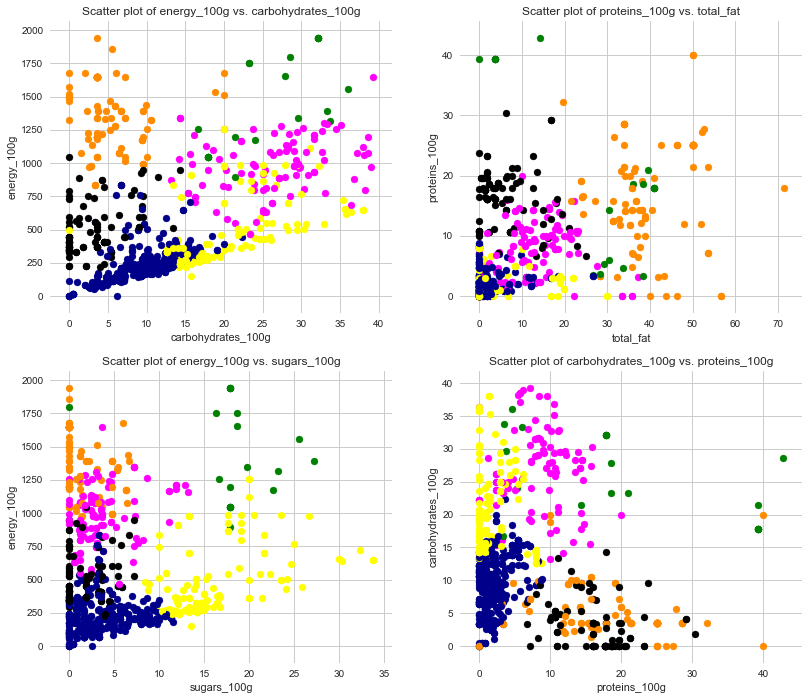

In [538]:
# plotting few columns against each other to see the clustering distribution
col_dic = {0:'darkblue',1:'green',2:'darkorange',3:'yellow',4:'magenta',5:'black', 6:'cyan', 7:'lime', 8:'red', 9:'darkviolet', 10:'grey'}
color_km = [col_dic[x] for x in df_keto_filtered['k_clusters']]

def plot_km_cluster(keto, color):
    fig, ax = plt.subplots(2, 2, figsize=(12,11)) # define plot area         
    x_cols = ['carbohydrates_100g', 'total_fat', 'sugars_100g', 'proteins_100g']
    y_cols = ['energy_100g', 'proteins_100g', 'energy_100g', 'carbohydrates_100g']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x,y,c in zip(keto_ml[x_col], keto_ml[y_col], color_km):
            ax[i,j].scatter(x,y, color = c)
        ax[i,j].set_title('Scatter plot of ' + y_col + ' vs. ' + x_col) # Give the plot a main title
        ax[i,j].set_xlabel(x_col) # Set text for the x axis
        ax[i,j].set_ylabel(y_col)# Set text for y axis
    plt.show()
    
plot_km_cluster(df_keto_filtered, color_km)

We see clear clusters for the plots with energy_100g as calories depend on all other macromolecules like protein, fat, sugars etc. Not seeing clear clusters when plotting in terms of fat or protein is something we expect to see as the clustering we did is not based on calories, but rather on the individual macronutrient content.

We will evaluate the kmeans clusters.

We will try to find some clear clusters with speficic food categories. The main food categories in a supermarket are:
1. Meat
2. fruits/vegetables
3. sweets
4. bread/pasta
5. beverages
6. milk/cheese/yogurt

Let's see if we can find clear food categories in the kmeans clusters

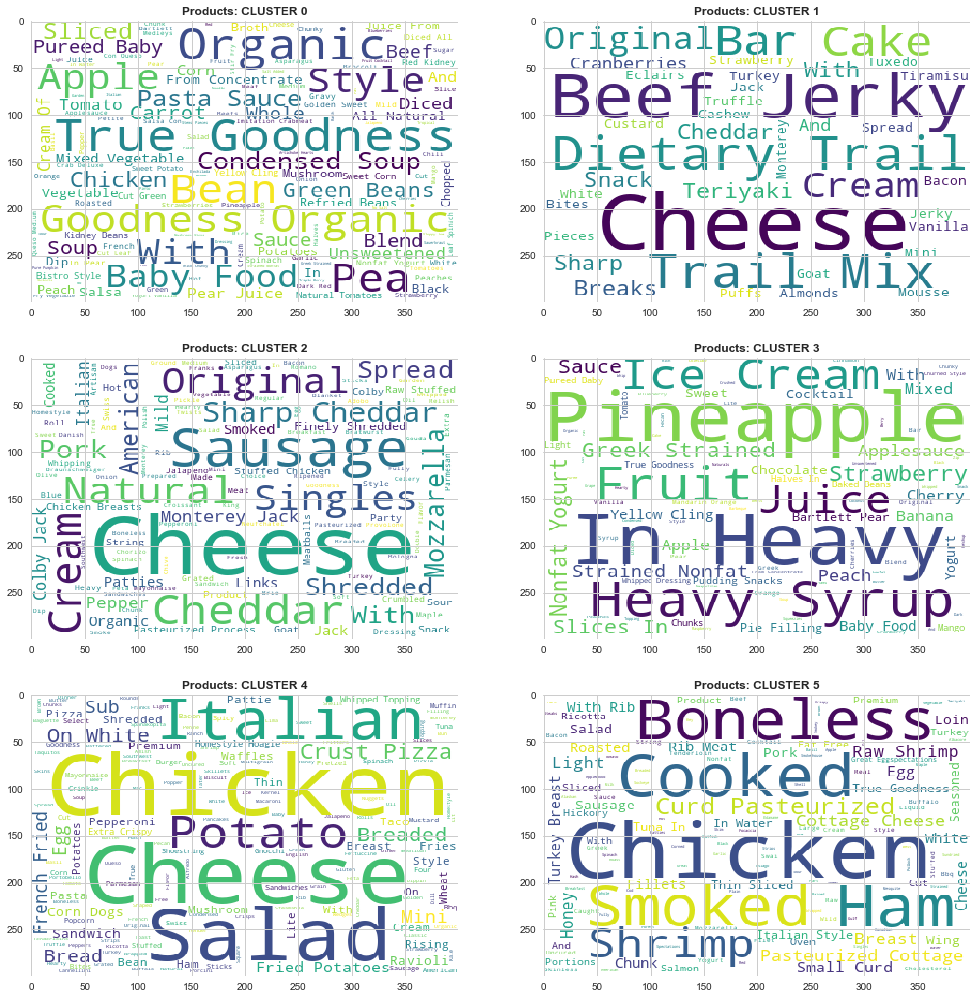

In [539]:
# Making the WordCloud of each cluster to visualize the products from each cluster
cluster0 = final_df[final_df['k_clusters']==0]
cluster1 = final_df[final_df['k_clusters']==1]
cluster2 = final_df[final_df['k_clusters']==2]
cluster3 = final_df[final_df['k_clusters']==3]
cluster4 = final_df[final_df['k_clusters']==4]
cluster5 = final_df[final_df['k_clusters']==5]

#Generate word clouds for each cluster
wordcloud4 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster0['product_name']))
WordCloud.generate_from_frequencies

wordcloud5 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster1['product_name']))
WordCloud.generate_from_frequencies

wordcloud6 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster2['product_name']))
WordCloud.generate_from_frequencies

wordcloud7 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster3['product_name']))
WordCloud.generate_from_frequencies

wordcloud8 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster4['product_name']))
WordCloud.generate_from_frequencies

wordcloud9 = WordCloud(width=400, height=300, background_color='white').generate(' '.join(cluster5['product_name']))
WordCloud.generate_from_frequencies

f, axarr = plt.subplots(3,2, figsize=(15,17))

# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
axarr[0,0].set_title('Products: CLUSTER 0', weight='bold')
axarr[0,0].imshow(wordcloud4, aspect='auto')

axarr[0,1].set_title('Products: CLUSTER 1',weight='bold')
axarr[0,1].imshow(wordcloud5, aspect='auto')

axarr[1,0].set_title('Products: CLUSTER 2',weight='bold')
axarr[1,0].imshow(wordcloud6, aspect='auto')

axarr[1,1].set_title('Products: CLUSTER 3',weight='bold')
axarr[1,1].imshow(wordcloud7, aspect='auto')

axarr[2,0].set_title('Products: CLUSTER 4',weight='bold')
axarr[2,0].imshow(wordcloud8, aspect='auto')

axarr[2,1].set_title('Products: CLUSTER 5',weight='bold')
axarr[2,1].imshow(wordcloud9, aspect='auto')

# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

#### Some clusters are mixed and some are clear, Cluster 0 was the biggest and hence has mixed items
##### Cluster 0: Mixed items (Salads/Vegetables/Soups)
##### Cluster 1: Snacks
##### Cluster 2: Cheese/Cream
##### Cluster 3: Fruits/Jiuces
##### Cluster 4: Salad ingredients/some unhealthy options like pizza and pasta
##### Cluster 5: Meat

We will analyze each cluster for its individual macromolecules vs. the nutritional score to get a nutritious keto meal

In [540]:
# code to display two dataframes side by side
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [541]:
# Generating the mean and median of each cluster for each macronutrient
Cluster0_mean = cluster0.mean().to_frame('Cluster 0 Mean')
Cluster0_med = cluster0.median().to_frame('Cluster 0 Median')
k = Cluster0_mean.style.set_caption('Mean of all macronutrients from Cluster 0')\
    .background_gradient(cmap='Blues')
l = Cluster0_med.style.set_caption('Median of all macronutrients from Cluster 0')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 0 Mean
energy_100g,227.721
total_fat,1.35386
carbohydrates_100g,9.03834
sugars_100g,3.75772
proteins_100g,1.99392
nutrition-score-fr_100g,0.109859
k_clusters,0
,Cluster 0 Median
energy_100g,209
total_fat,0


In [542]:
Cluster1_mean = cluster1.mean().to_frame('Cluster 1 Mean')
Cluster1_med = cluster1.median().to_frame('Cluster 1 Median')
k = Cluster1_mean.style.set_caption('Mean of all macronutrients from Cluster 1')\
    .background_gradient(cmap='Blues')
l = Cluster1_med.style.set_caption('Median of all macronutrients from Cluster 1')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 1 Mean
energy_100g,1432.05
total_fat,25.1229
carbohydrates_100g,25.5771
sugars_100g,18.34
proteins_100g,21.3819
nutrition-score-fr_100g,15.7143
k_clusters,1
,Cluster 1 Median
energy_100g,1343
total_fat,30.3


In [543]:
Cluster2_mean = cluster2.mean().to_frame('Cluster 2 Mean')
Cluster2_med = cluster2.median().to_frame('Cluster 2 Median')
k = Cluster2_mean.style.set_caption('Mean of all macronutrients from Cluster 2')\
    .background_gradient(cmap='Blues')
l = Cluster2_med.style.set_caption('Median of all macronutrients from Cluster 2')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 2 Mean
energy_100g,1374.81
total_fat,40.5786
carbohydrates_100g,4.96991
sugars_100g,1.53296
proteins_100g,17.8239
nutrition-score-fr_100g,19.2222
k_clusters,2
,Cluster 2 Median
energy_100g,1393
total_fat,38.1


In [544]:
Cluster3_mean = cluster3.mean().to_frame('Cluster 3 Mean')
Cluster3_med = cluster3.median().to_frame('Cluster 3 Median')
k = Cluster3_mean.style.set_caption('Mean of all macronutrients from Cluster 3')\
    .background_gradient(cmap='Blues')
l = Cluster3_med.style.set_caption('Median of all macronutrients from Cluster 3')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 3 Mean
energy_100g,464.84
total_fat,3.3672
carbohydrates_100g,20.1873
sugars_100g,15.828
proteins_100g,1.82067
nutrition-score-fr_100g,3.86
k_clusters,3
,Cluster 3 Median
energy_100g,362
total_fat,0


In [545]:
Cluster4_mean = cluster4.mean().to_frame('Cluster 4 Mean')
Cluster4_med = cluster4.median().to_frame('Cluster 4 Median')
k = Cluster4_mean.style.set_caption('Mean of all macronutrients from Cluster 4')\
    .background_gradient(cmap='Blues')
l = Cluster4_med.style.set_caption('Median of all macronutrients from Cluster 4')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 4 Mean
energy_100g,979.099
total_fat,13.8378
carbohydrates_100g,26.349
sugars_100g,3.7501
proteins_100g,7.98762
nutrition-score-fr_100g,7.51485
k_clusters,4
,Cluster 4 Median
energy_100g,975
total_fat,12.81


In [546]:
Cluster5_mean = cluster5.mean().to_frame('Cluster 5 Mean')
Cluster5_med = cluster5.median().to_frame('Cluster 5 Median')
k = Cluster5_mean.style.set_caption('Mean of all macronutrients from Cluster 5')\
    .background_gradient(cmap='Blues')
l = Cluster5_med.style.set_caption('Median of all macronutrients from Cluster 5')\
    .background_gradient(cmap='Reds')
multi_table([k, l])

,Cluster 5 Mean
energy_100g,500.887
total_fat,5.89062
carbohydrates_100g,3.17753
sugars_100g,1.68072
proteins_100g,16.0602
nutrition-score-fr_100g,2.53608
k_clusters,5
,Cluster 5 Median
energy_100g,448
total_fat,3.57


## Each cluster analysis based on WordCloud and Descriptive Statistics

Generally, popular ketogenic resources suggest an average of 70-80% fat from total daily calories, 5-10% carbohydrate, and 10-20% protein. 

For a 2000-calorie diet, this translates to about 165 grams fat, 40 grams carbohydrate, and 75 grams protein. 

If you’re on a keto diet, you know that staying and getting into ketosis (the whole goal of going keto), is achieved by eating a higher fat, moderate protein, and low-carb diet. The perfect amount of daily carbs is different for each person; some people can easily get into ketosis and stay there on 50 grams of toal carbs per day while others need to stay at around 20  grams of total carbs per day. So here I am considering carbs below 40g in a day as the cutoff for the keto diet. 

The Mean and Median of all clusters are pretty similar indication good classification of products into each clusters based on its macronutrients.

### Cluster 0:
Looks like this cluster has low energy products (200 cal), no significant high fat or high protein products required for keto diet specifically and has also very low nutritional score. However since this group also had low sugars and carbs it is not all bad. This cluster can be used as snacks between the meals.

### Cluster 1:
From the WordCloud for this cluster, it looks like this cluster has a mix of good snacks like Beef Jerky, Trail Mix, Cheese, Almonds and also some sweets like Cranberries, Cake, Eclairs, Tiramisu, Custard which makes this cluster a little high on carbohydrate and sugar levels which leads to high energy. But this cluster also have relatively high fat and high protein products which had decent nutritional scores. In this cluster there are some products which are a good pick for Keto diet.

### Cluster 2:
This cluster is one of the prefect clusters for Keto diet products. It has all the dietary requirements for a Keto diet. This cluster has high fat, high protein, low carb and sugar products with good nutritional score.

### Cluster 3:
This cluster has low fat, low protein products with relatively high carbs and sugars. Considering this cluster has fruits and juices according to the WordCloud, this is the right predcition of macronutrients. This cluster is not so good for Keto diet planning and shopping.

### Cluster 4:
This cluster has decent amount of fats and proteins, even though it is relatively high on carbs (still <40g) and has decent nutritional score. According to the WordCloud, some products like pizzas and pasta is making this cluster a little unfavourable.

### Cluster 5:
This cluster is high in protein and low in carbs and sugars, considering this had mostly meats from the WordCloud. This is also one of the good clusters to consider for the Keto because of the high protein content.

In conclusion, if I had to suggest which clusters to pick for a nutritional Keto diet planning, I would mix products from the clusters 1,2,4, and 5. Can consider cluster 0 for some unharmful snacking.

Effectively, k=6 clusters was not the optimum value since we got some clusters that are not clear with mixed products, which means there is still significant room for improvement. However, in the other clusters, we could see a clear dominance of certain type of food, for example, cluster 5 has mainly: boneless meat, chicken, turkey, ham, bacon, sausages, and shrimp. The clear clusters tend to be the smallest, with fewer products in comparison to other clusters. This invites us to increase the number of clusters in order to decrease the variation between clusters. 